HELP International is an international humanitarian NGO that is committed to
fighting poverty and providing the people of backward countries with basic
amenities and relief during the time of disasters and natural calamities. After
the recent project that included a lot of awareness drives and funding
programmes, they have been able to raise around $ 10 million. The significant
issues that come while making this decision are mostly related to choosing the
countries that are in the direst need of aid.
How will you help this NGO to make a correct decision based on socioeconomic and health factors?

In [1]:
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the file
country_details = pd.read_csv("/content/drive/MyDrive/ICTAK/Country-data.csv")
country_details.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_details.shape

(167, 10)

In [5]:
country_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#checking for duplicates
country_details.duplicated(subset = ['country'], keep = False).sum()

0

In [7]:
# Checking for null values in the column
country_details.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
#checking if any columns having unique value ie only 1 value
unique =country_details.nunique()
unique = unique[unique.values ==1]
unique

Series([], dtype: int64)

No unique value

In [9]:
#Looking for spelling mistakes
print(country_details['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

No spelling mistakes.

In [10]:
#checking for Outliers
country_details.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7f5be05e12d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5be05e63d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5be05ee410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5be05e6e90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5be05e1910>,
  <matplotlib.lines.Line2D at 0x7f5be05e1e50>]}

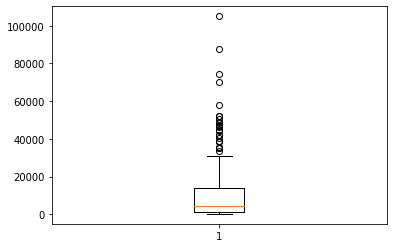

In [12]:
plt.boxplot(country_details.gdpp)

{'boxes': [<matplotlib.lines.Line2D at 0x7f5be0554f50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5be0562090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5be056d0d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5be0562b50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5be055b5d0>,
  <matplotlib.lines.Line2D at 0x7f5be055bb10>]}

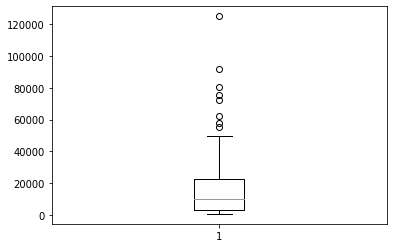

In [13]:
plt.boxplot(country_details.income)

{'whiskers': [<matplotlib.lines.Line2D object at 0x7f5be04cfa90>, <matplotlib.lines.Line2D object at 0x7f5be04cffd0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f5be04d6550>, <matplotlib.lines.Line2D object at 0x7f5be04d6a90>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f5be04cf450>], 'medians': [<matplotlib.lines.Line2D object at 0x7f5be04de050>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f5be04de590>], 'means': []}


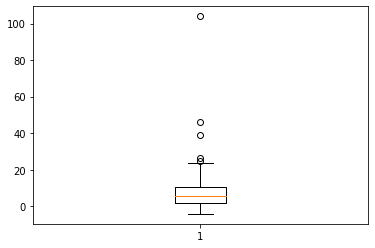

In [14]:
print(plt.boxplot(country_details.inflation))

gdpp, income and inflation column has high outliers. The outliers are not removed from inflation as this might lead to loss in country details which are not doing well- socio-economically(countries with direst need of aid).

In [15]:
country_details.set_index('country',inplace = True)

In [16]:
country_details.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [17]:
Q1 = country_details.gdpp.quantile(0.05)
Q3 = country_details.gdpp.quantile(0.95)
#IQR = Q3-Q1
country_df = country_details[(country_details.gdpp <= Q3)]

In [18]:
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,39.447462,6.688671,46.378265,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,25.243334,2.683807,23.229783,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,23.575000,4.872500,30.475000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,34.000000,6.105000,43.250000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,50.675000,8.250000,58.475000,20100.000000,11.175000,76.400000,4.200000,12075.000000
90%,103.100000,68.030000,10.560000,72.110000,36200.000000,16.850000,80.030000,5.346000,31670.000000
95%,116.450000,77.615000,11.345000,80.320000,41415.000000,21.125000,80.960000,5.912000,41815.000000
99%,154.300000,119.256000,13.573000,127.780000,73433.000000,42.081000,82.301000,6.567200,47115.000000


Most of the outliers are handled by gdpp column.

In [19]:
country_df.shape

(158, 9)

<Figure size 288x288 with 0 Axes>

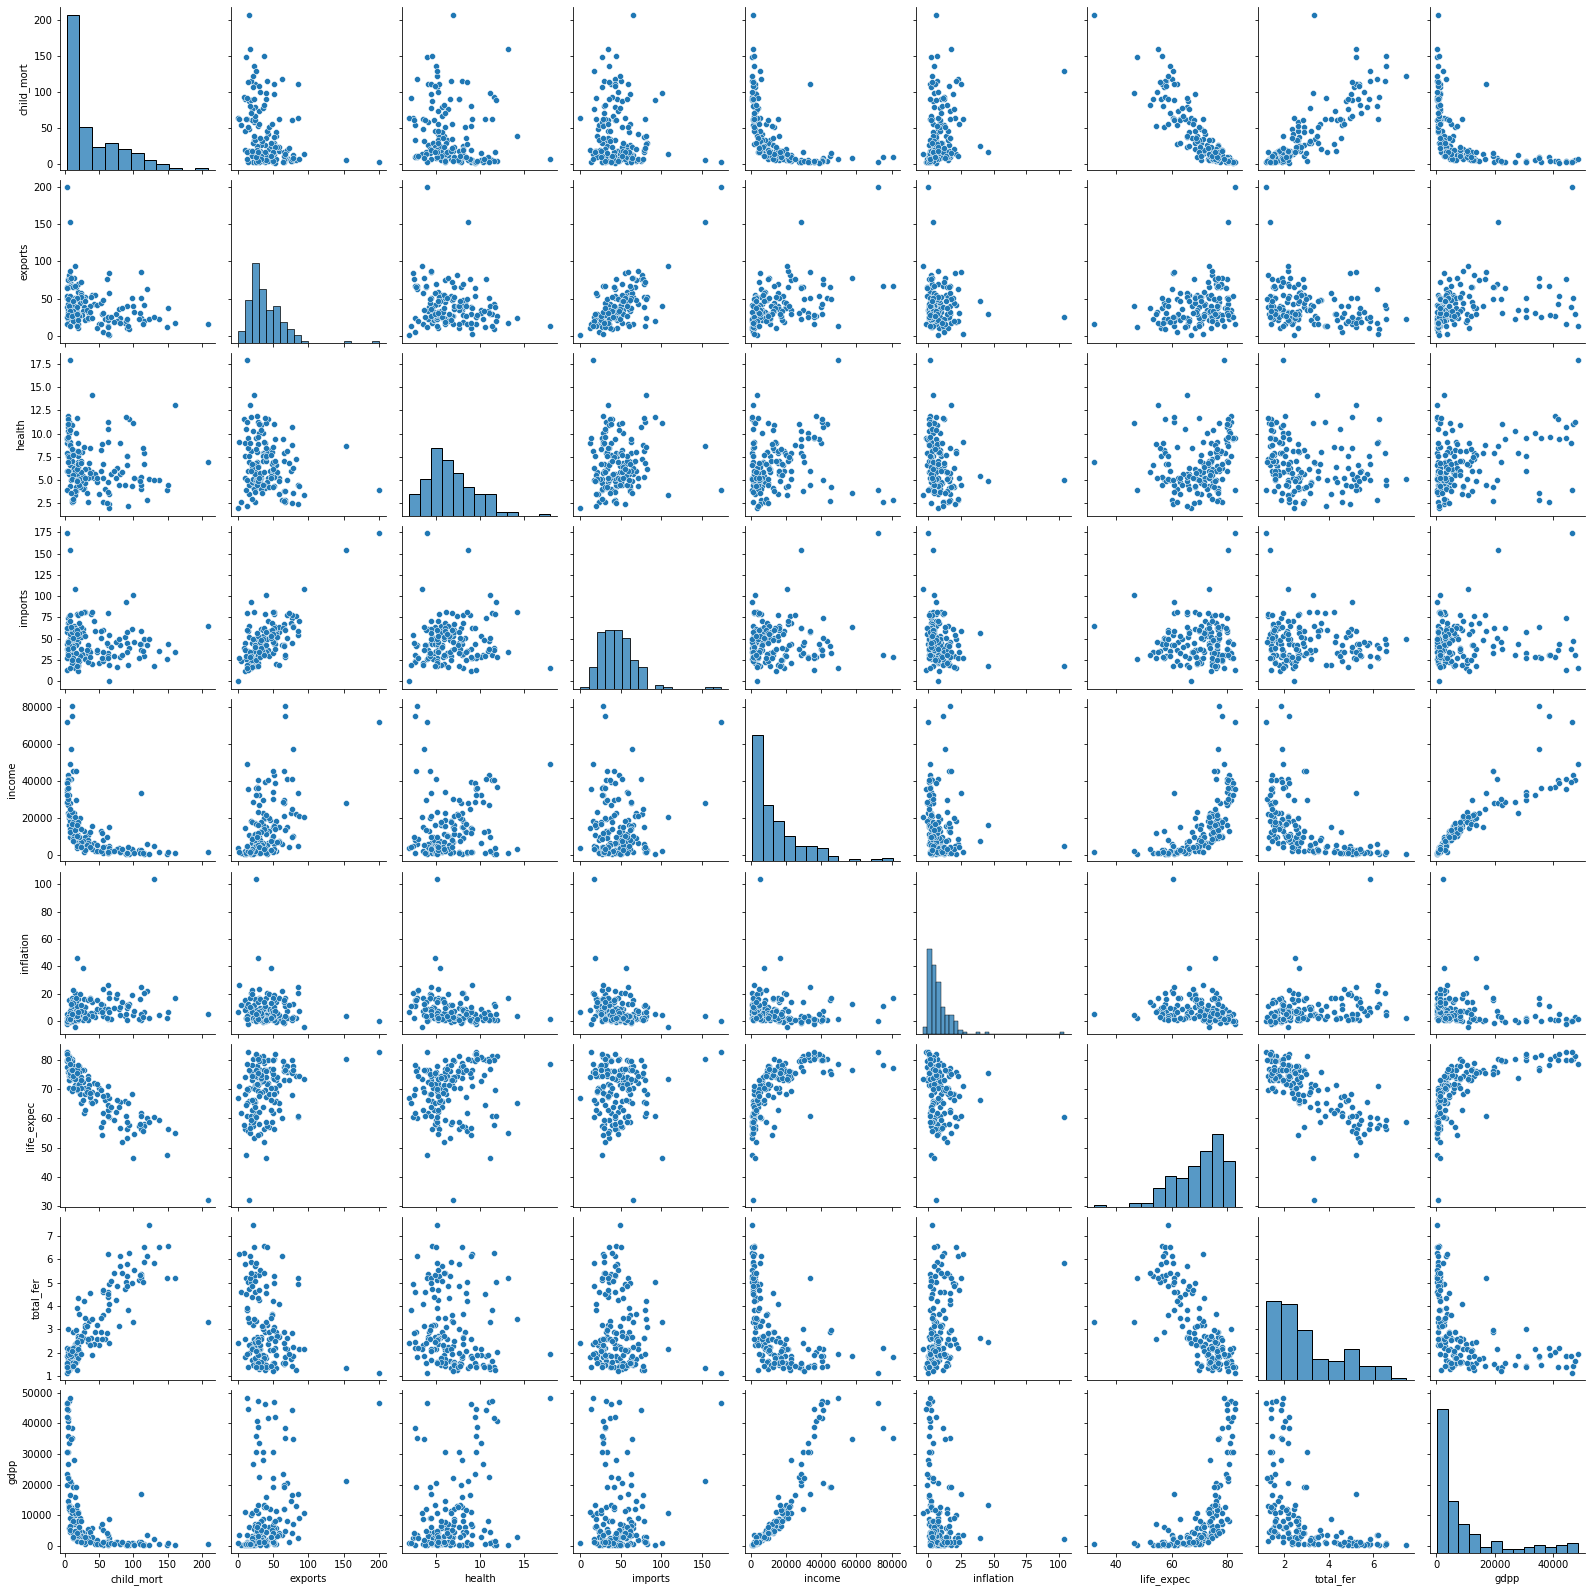

In [20]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(country_df)
plt.show()

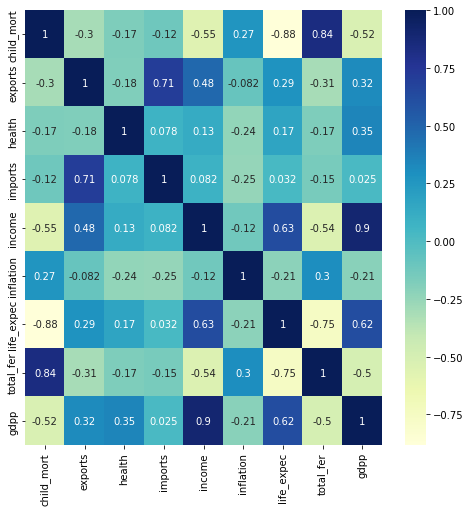

In [21]:
#heatmap to understand the corelation.
plt.figure(figsize = (8,8))  
sns.heatmap(country_df.corr(),annot = True,cmap="YlGnBu")

The correlation is high between total_fer and child_mort, between gdpp and income,and between imports and exports

In [22]:
#standardise all parameters
#country_norm = country_details.drop("country", axis=1)

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_norm = standard_scaler.fit_transform(country_df)

In [23]:
country_norm = pd.DataFrame(country_norm)
country_norm.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234847,-1.170253,0.333170,-0.063839,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.454926,-0.051834,0.095946,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.041627,-0.941453,-0.646837,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,0.908169,-1.434856,-0.150209,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.240530,-0.246204,0.540752,0.295540,-0.620888,0.780774,-0.575585,0.180376


In [24]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [25]:
#Doing the PCA on the data
pca.fit(country_norm)

PCA(random_state=42, svd_solver='randomized')

In [26]:
pca.components_

array([[-4.29030525e-01,  2.55209832e-01,  1.34178285e-01,
         1.31450432e-01,  4.07693446e-01, -1.79172211e-01,
         4.31281152e-01, -4.14623599e-01,  3.99105167e-01],
       [ 1.11571336e-01,  6.26379514e-01, -2.77405040e-01,
         6.77160121e-01, -2.31878558e-02, -5.16544119e-02,
        -1.67479074e-01,  7.48372976e-02, -1.51147079e-01],
       [-4.15586874e-02,  1.65804096e-01, -6.21898369e-01,
        -3.00546950e-01,  2.52933247e-01,  6.41231036e-01,
         1.20926305e-01,  5.91157438e-03,  6.23316904e-02],
       [ 3.78896334e-01,  1.25334264e-01,  4.18106890e-01,
         3.92312068e-02,  4.08208237e-01,  2.46846528e-01,
        -2.31647606e-01,  3.66642523e-01,  4.98720267e-01],
       [-2.10302855e-01,  2.05622263e-02,  4.97644383e-01,
         2.62211666e-01, -2.60517467e-01,  6.88800973e-01,
         1.29156175e-01, -1.65619335e-01, -2.29167627e-01],
       [ 1.86245017e-01, -5.01345979e-02, -4.28272915e-03,
        -4.26434872e-02,  1.45028292e-01,  6.489172

In [27]:
#Understanding how the variables are loaded on the principal components. 
colnames = list(country_norm.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3], 'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6], 'PC8':pca.components_[7],'PC9':pca.components_[8],
                       'Feature':colnames})
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-0.429031,0.111571,-0.041559,0.378896,-0.210303,0.186245,0.021920,0.717303,0.253528,child_mort
1,0.255210,0.626380,0.165804,0.125334,0.020562,-0.050135,-0.687057,0.084911,-0.130857,exports
2,0.134178,-0.277405,-0.621898,0.418107,0.497644,-0.004283,-0.286172,-0.018871,0.116417,health
3,0.131450,0.677160,-0.300547,0.039231,0.262212,-0.042643,0.598129,-0.016664,0.060813,imports
4,0.407693,-0.023188,0.252933,0.408208,-0.260517,0.145028,0.087549,-0.298465,0.645748,income
5,-0.179172,-0.051654,0.641231,0.246847,0.688801,0.064892,0.111285,0.005323,-0.045257,inflation
6,0.431281,-0.167479,0.120926,-0.231648,0.129156,-0.605914,0.060919,0.521296,0.241639,life_expec
7,-0.414624,0.074837,0.005912,0.366643,-0.165619,-0.754047,-0.003597,-0.303233,-0.006760,total_fer
8,0.399105,-0.151147,0.062332,0.498720,-0.229168,0.000134,0.253074,0.157553,-0.651057,gdpp


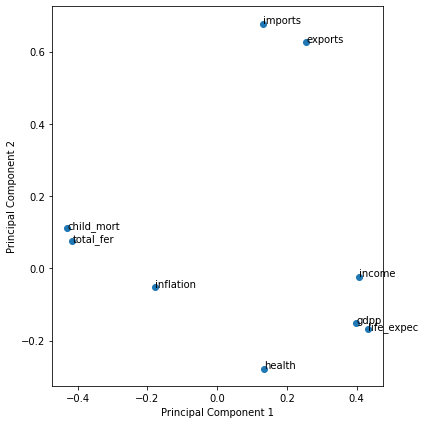

In [28]:
# Let's plot them to visualise how these features are loaded

%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [29]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.45480475, 0.1766364 , 0.13336189, 0.10604223, 0.07260472,
       0.02594781, 0.01392215, 0.01011373, 0.00656633])

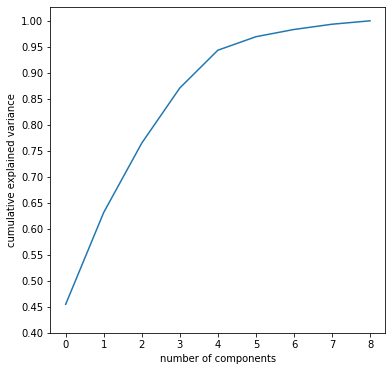

In [30]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.yticks(np.arange(0.4,1.05,0.05))
plt.show()

Around 95% of the variance is being explained by 5 components

In [32]:
#Using incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [33]:
df_final1 = pca_final.fit_transform(country_norm)
df_final1.shape

(158, 5)

In [34]:
#check for correlation after PCA
corrmat = np.corrcoef(df_final1.transpose())

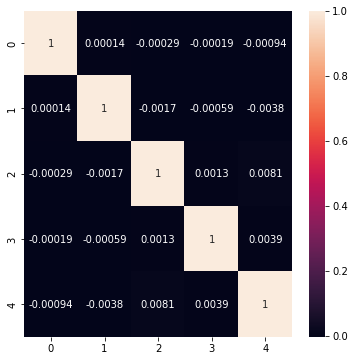

In [35]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (6,6))
sns.heatmap(corrmat,annot = True)

In [36]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.008069188238945113 , min corr:  -0.0038318816332864954


In [37]:
#Creating a transpose so that the each column is properly arranged:
pc = np.transpose(df_final1)
df_final = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3],'PC5':pc[4]})
df_final.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098
1,0.571663,-0.365855,-0.285368,-1.233879,0.278467
2,-0.082299,-0.334262,1.307774,-0.813505,0.215401
3,-2.830780,1.451765,1.559083,1.124602,-0.375038
4,1.295018,0.323543,-0.154906,-0.664375,-0.173215


In [38]:
df_final.shape

(158, 5)

Kmeans with K= 4

In [39]:
df_km = df_final

In [40]:
model_clus4 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus4.fit(df_km)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [41]:
df_km1 = df_final
df_km1.index = pd.RangeIndex(len(df_km1.index))
countries_detail_km = pd.concat([df_km1, pd.Series(model_clus4.labels_)], axis=1)
countries_detail_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
countries_detail_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,0.571663,-0.365855,-0.285368,-1.233879,0.278467,0
2,-0.082299,-0.334262,1.307774,-0.813505,0.215401,0
3,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,1.295018,0.323543,-0.154906,-0.664375,-0.173215,0


In [42]:
countries_detail_km['ClusterID'].value_counts()

0    83
1    46
2    27
3     2
Name: ClusterID, dtype: int64

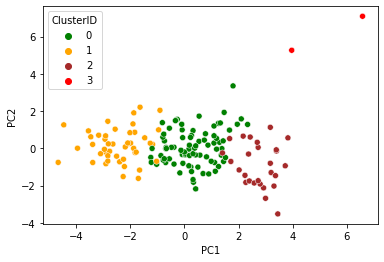

In [43]:
# scatter plot for PC1, PC2 and clusterId
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=countries_detail_km, palette=['green','orange','brown','red'])

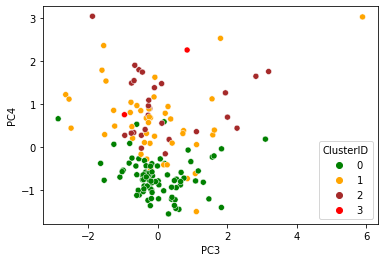

In [44]:
# scatter plot for PC3, PC4 and clusterId
sns.scatterplot(x='PC3',y='PC4',hue='ClusterID',legend='full',data=countries_detail_km,palette=['green','orange','brown','red'])

In [45]:
# merge b/w km df and actually data
country_merge_km=pd.merge(country_df.reset_index(),countries_detail_km,left_index=True,right_index=True )
country_merge_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.571663,-0.365855,-0.285368,-1.233879,0.278467,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.082299,-0.334262,1.307774,-0.813505,0.215401,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.295018,0.323543,-0.154906,-0.664375,-0.173215,0


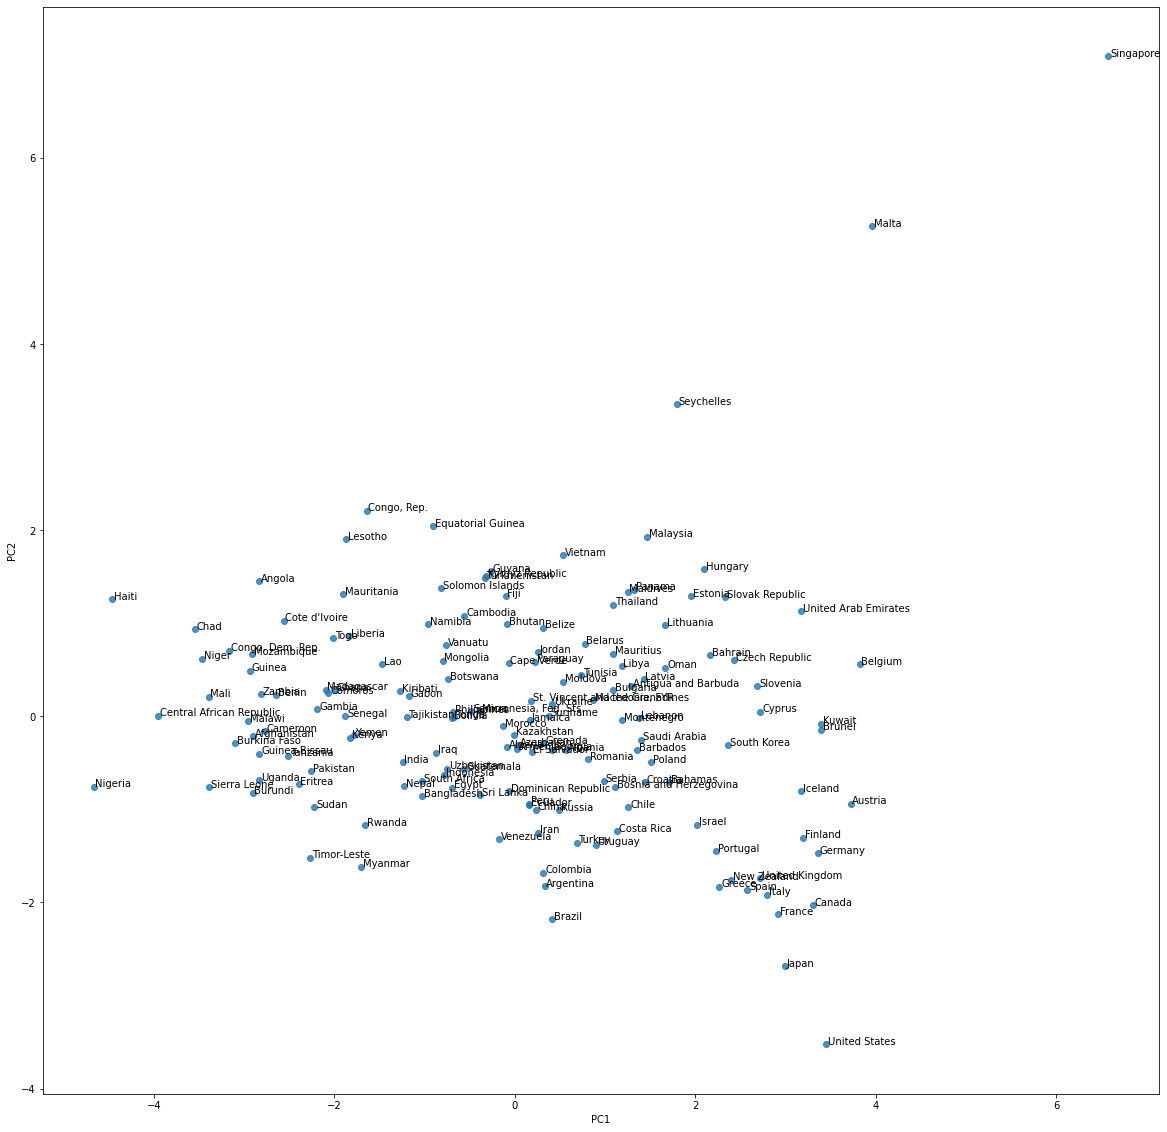

In [46]:
#plot b/w PC1, PC2 and country
plt.figure(figsize=(20, 20))
sns.regplot(x='PC1', y='PC2', data=country_merge_km, fit_reg=False)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(country_merge_km.PC1, country_merge_km.PC2, country_merge_km.country, plt.gca())

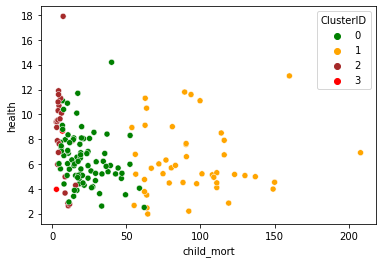

In [47]:
# scatterplot for child_mort, health and cluster Id
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red'])

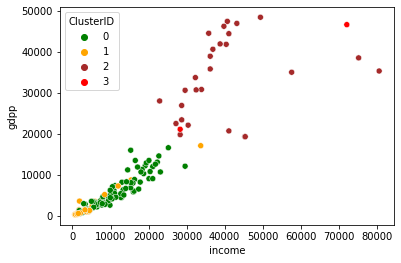

In [48]:
# scatterplot between income, gdpp and cluster ID
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red'])

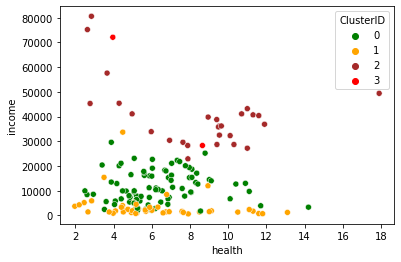

In [49]:
# scatterplot for health, income for different cluster id
sns.scatterplot(x='health',y='income',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red'])

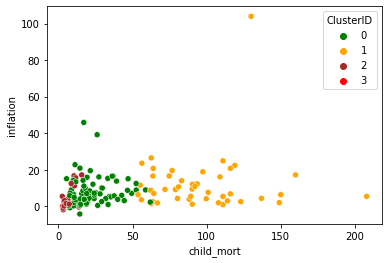

In [50]:
# scatterplot for infaltion, child mort for different cluster id
sns.scatterplot(y='inflation',x='child_mort',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red'])

In [51]:
country_final=country_merge_km.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the original datapoints

**Analysis of the clusters:**

In [52]:
child_mort_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).child_mort.mean())
exports_mean= 	pd.DataFrame(country_final.groupby(["ClusterID"]).exports.mean())
health_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).health.mean())
imports_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).imports.mean())
income_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).income.mean())
inflat_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).inflation.mean())
life_expec_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).gdpp.mean())

In [53]:
country_analysis_df = pd.concat([pd.Series([0,1,2,3]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

In [54]:
country_analysis_df.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_analysis_df

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,22.080723,40.835904,6.379036,48.590361,11657.228916,7.530530,72.583133,2.320120,6081.012048
1,1,94.439130,27.983022,6.206957,41.388389,3543.760870,11.879239,59.223913,5.007609,1749.782609
2,2,6.092593,44.559259,8.489630,39.366667,39933.333333,3.868037,79.370370,1.855185,33829.629630
3,3,4.800000,176.500000,6.305000,164.000000,50200.000000,1.892000,81.500000,1.255000,33850.000000


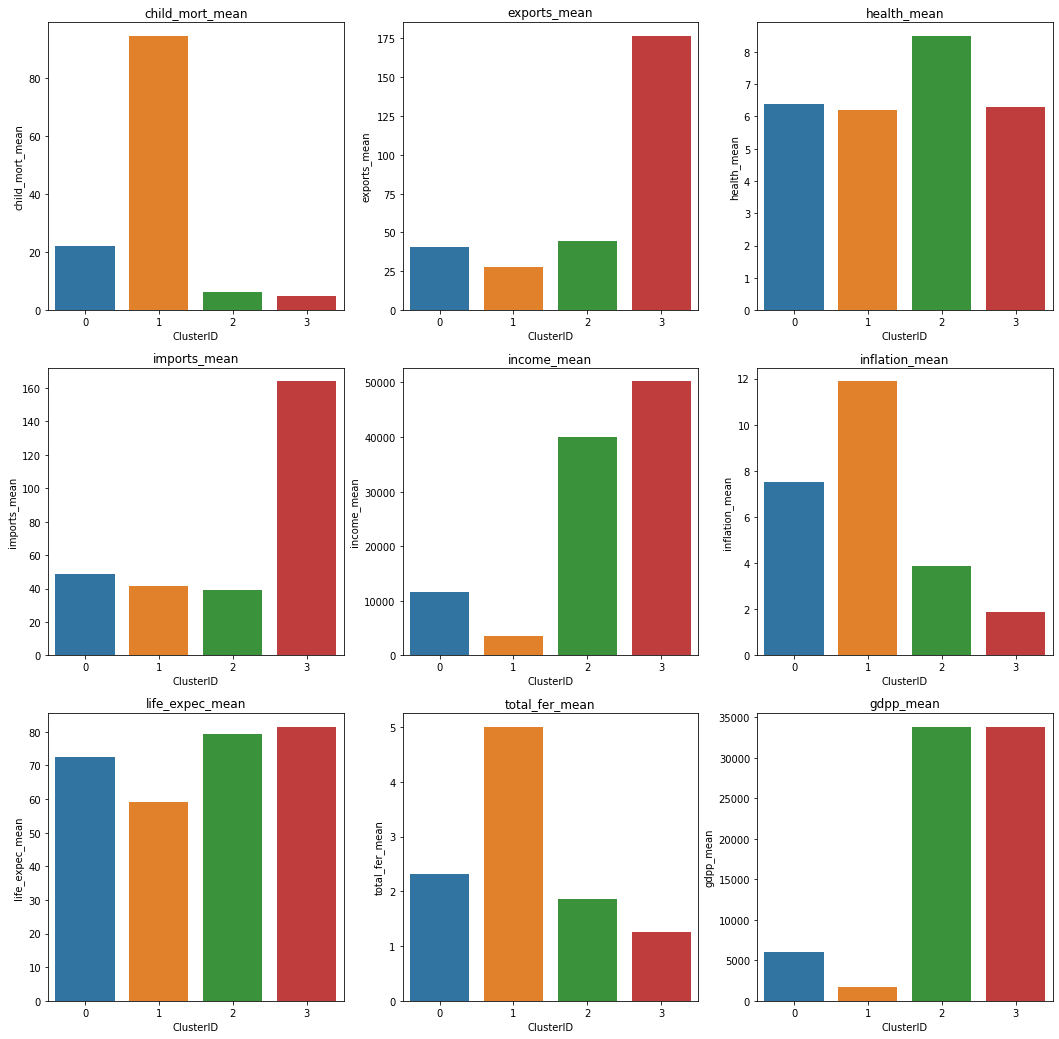

In [55]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(country_analysis_df.ClusterID, country_analysis_df.gdpp_mean)

plt.show()

Looking at the graph we are certain that cluster 1 is our cluster of concern. Because:

1. It has highest child mortality
2. Lowest income
3. Highest Inflation
4. Compartively low life expectancy 
5. Highest total fertility 
6. Lowest gdpp.

In [56]:
#Let us bin our cluster 1
cluster_km=country_final[country_final['ClusterID']==1]
cluster_km.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1
89,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,1
102,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,1
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,1
48,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,1


As per K- means clustering, the country which are direst need of aid are:

1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10.Eritrea

heirarchical Clustering

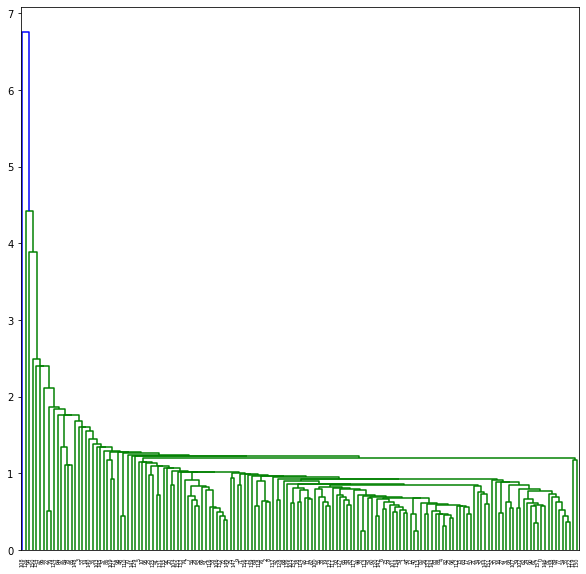

In [58]:
# heirarchical clustering single method
df_clustering = df_final
fig = plt.figure(figsize = (10,10))
mergings = linkage(df_clustering, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

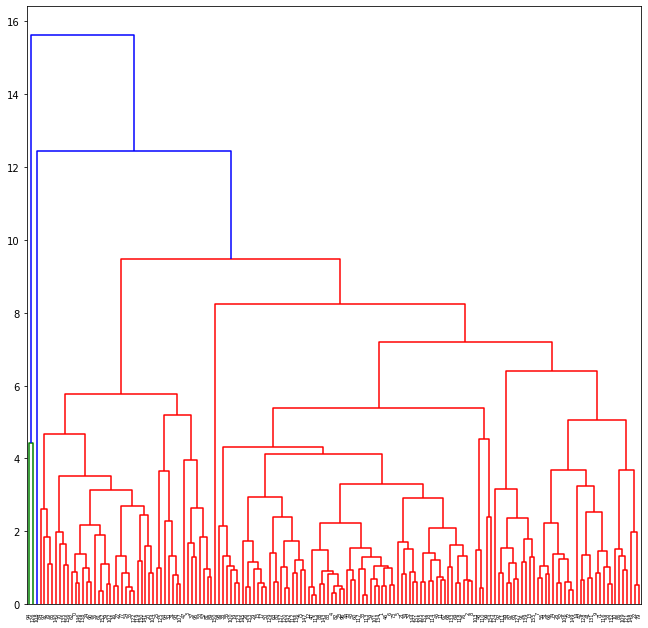

In [59]:
# HC with complete method
fig = plt.figure(figsize = (11,11))
mergings = linkage(df_clustering, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Let us cut the dendrogram vertically such that n_clusters = 4

In [60]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

In [61]:
country_hc = pd.concat([country_df.reset_index(), clusterCut], axis=1)
country_hc.columns = ['country', 'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp',
                  'ClusterID']
country_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [62]:
country_hc['ClusterID'].value_counts()

1    110
0     45
2      2
3      1
Name: ClusterID, dtype: int64

Scatterplots between original variables and cluster id:

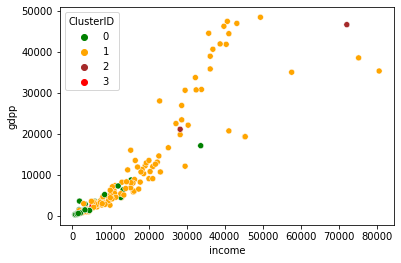

In [63]:
# scatterplot for income,gdpp for different cluster ids
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',legend='full',data=country_hc,palette=['green','orange','brown','red'])

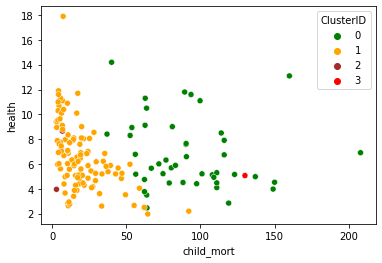

In [64]:
# scatterplot for child mort ,inflation for different cluster ids
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',legend='full',data=country_hc,palette=['green','orange','brown','red'])

Analysis of the clusters:

In [65]:
child_mort_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).child_mort.mean())
exports_mean_hc= 	pd.DataFrame(country_hc.groupby(["ClusterID"]).exports.mean())
health_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).health.mean())
imports_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).imports.mean())
income_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).income.mean())
inflat_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).inflation.mean())
life_expec_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean_hc = 	pd.DataFrame(country_hc.groupby(["ClusterID"]).gdpp.mean())

In [67]:
country_analysis_df_hc= pd.concat([pd.Series([0,1,2,3]),child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflat_mean_hc,life_expec_mean_hc,
                                 total_fer_mean_hc,gdpp_mean_hc], axis=1)

In [68]:
country_analysis_df_hc.columns = ["ClusterID","child_mort_mean_hc","exports_mean_hc","health_mean_hc","imports_mean_hc","income_mean_hc","inflation_mean_hc","life_expec_mean_hc","total_fer_mean_hc","gdpp_mean_hc"]
country_analysis_df_hc

,ClusterID,child_mort_mean_hc,exports_mean_hc,health_mean_hc,imports_mean_hc,income_mean_hc,inflation_mean_hc,life_expec_mean_hc,total_fer_mean_hc,gdpp_mean_hc
0,0,91.820000,30.000444,6.767333,44.668889,3950.733333,9.827222,59.104444,4.989778,1985.777778
1,1,18.904545,40.948900,6.678182,45.202417,18416.636364,6.633555,74.286364,2.205727,12790.218182
2,2,4.800000,176.500000,6.305000,164.000000,50200.000000,1.892000,81.500000,1.255000,33850.000000
3,3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


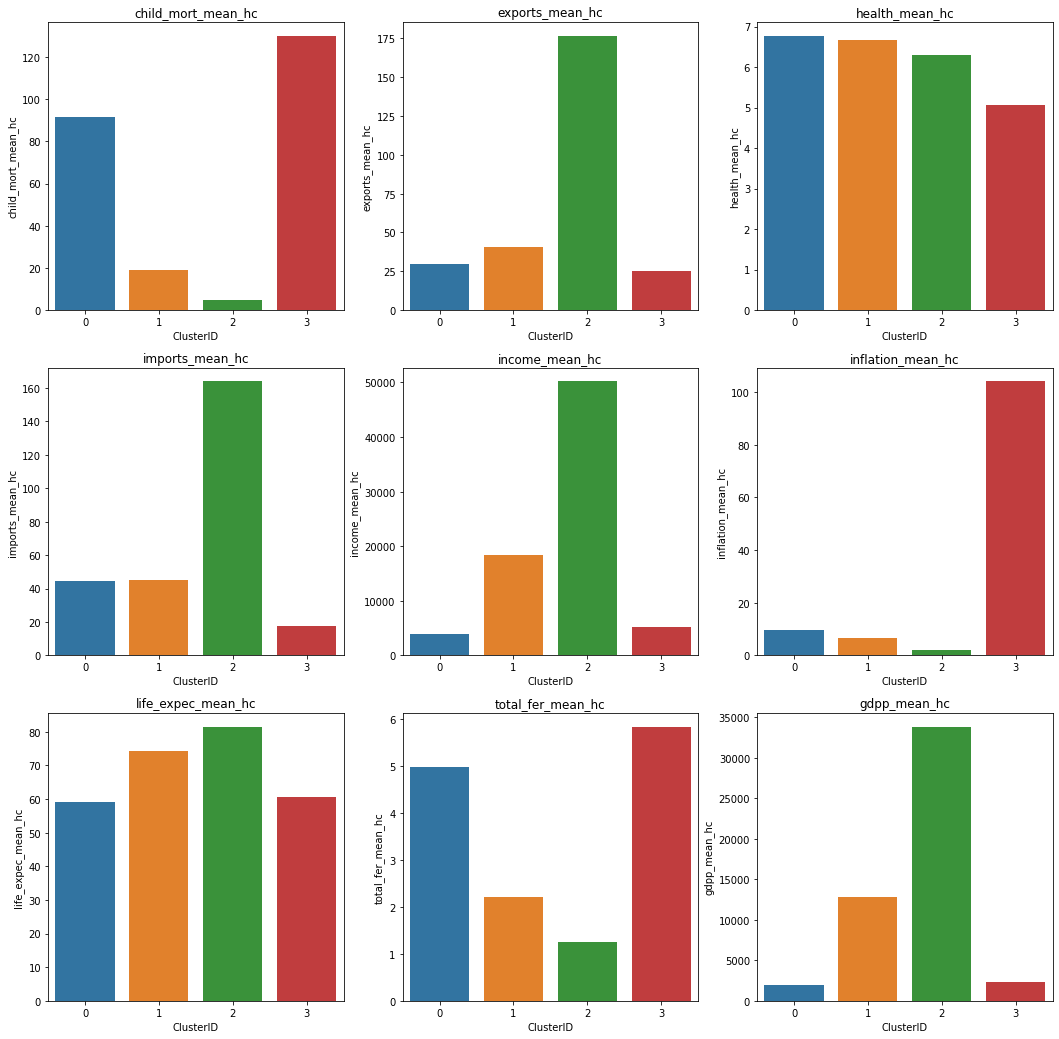

In [69]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.child_mort_mean_hc)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.exports_mean_hc)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.health_mean_hc)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.imports_mean_hc)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.income_mean_hc)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.inflation_mean_hc)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.life_expec_mean_hc)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.total_fer_mean_hc)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean_hc")
sns.barplot(country_analysis_df_hc.ClusterID, country_analysis_df_hc.gdpp_mean_hc)

plt.show()

Looking at the graph we are certain that cluster 0 is our cluster of concern. Because:

It has highest child mortality
Lowest income
Highest Inflation
Compartively low life expectancy
Highest total fertility
Which all in turn leads to lowest gdpp.

With business aspect,ignoring cluster 3 as it has just one country.

In [70]:
#Let us bin our cluster 0
cluster_hc=country_hc[country_hc['ClusterID']==0]
cluster_hc.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0
89,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0
102,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0
30,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0
90,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0
141,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0


As per Heirarchical Clustering, the countries which require aid are:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10.Togo

We got same countries by both K-means and Heirarchical Clustering: Therefore following are the countries which are in direst need of aid by considering socio – economic factor into consideration:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi